In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
# import uproot
import time
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import uproot
from scipy import stats

In [2]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Gamma_v2/Skimmed_output*01.root"
]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','dZ','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Gamma_v2/Skimmed_output*01.root   



In [3]:
# data_frame_dict[files_g]['Z'].hist()

In [4]:
for files_g in filenames_g:
    print(data_frame_dict[files_g])

                  X          Y        dX        dY        dZ     Ekine
0        -14.487143 -84.624664 -0.026272 -0.158793 -0.986962  3.883497
1        -61.455502  24.998810 -0.113341  0.051654 -0.992212  1.929754
2        -64.910873 -66.026482 -0.139010 -0.132594 -0.981374  2.786299
3        -68.263130  64.836922 -0.181415  0.179180 -0.966945  0.645651
4        -20.461679  88.280960  0.132952 -0.026879 -0.990758  0.583883
...             ...        ...       ...       ...       ...       ...
6353054  -40.129360  82.570488 -0.077789  0.155419 -0.984781  3.617901
6353055  -16.753326  38.258377 -0.029096  0.072226 -0.996964  2.629660
6353056   55.943542   7.058526  0.106609  0.010262 -0.994248  1.302521
6353057  101.832230  82.864456  0.187322  0.151774 -0.970502  0.354317
6353058   -5.780255 -19.661636 -0.012933 -0.038058 -0.999192  2.977500

[6353059 rows x 6 columns]


In [5]:
# pd.set_option('mode.use_inf_as_na', True)
# dfe10tot.index[np.isinf(dfe10tot).any(1)]
# # dfe10tot.loc[[129168038]]
# dfe10tot=dfe10tot.dropna()

In [6]:
for files_g in filenames_g:
    df=data_frame_dict[files_g]
    nparr=df.to_numpy()
    values=nparr.T
values

array([[-1.4487143e+01, -6.1455502e+01, -6.4910873e+01, ...,
         5.5943542e+01,  1.0183223e+02, -5.7802553e+00],
       [-8.4624664e+01,  2.4998810e+01, -6.6026482e+01, ...,
         7.0585256e+00,  8.2864456e+01, -1.9661636e+01],
       [-2.6272204e-02, -1.1334131e-01, -1.3900952e-01, ...,
         1.0660912e-01,  1.8732165e-01, -1.2933023e-02],
       [-1.5879324e-01,  5.1653638e-02, -1.3259417e-01, ...,
         1.0262380e-02,  1.5177442e-01, -3.8058046e-02],
       [-9.8696226e-01, -9.9221247e-01, -9.8137408e-01, ...,
        -9.9424803e-01, -9.7050250e-01, -9.9919182e-01],
       [ 3.8834970e+00,  1.9297538e+00,  2.7862990e+00, ...,
         1.3025215e+00,  3.5431707e-01,  2.9775004e+00]], dtype=float32)

In [7]:
bandwidth=0.02

<AxesSubplot:ylabel='Density'>

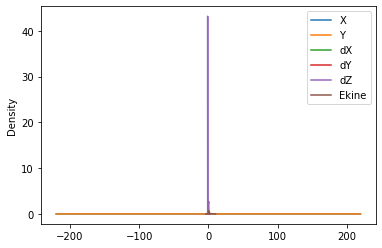

In [22]:
df.plot.kde(bw_method=bandwidth)

In [10]:
kde = stats.gaussian_kde(values,bw_method=bandwidth)


In [17]:
kde.weights.shape

(6353059,)

In [20]:
newsample = stats.gaussian_kde.resample(kde,3000)
# newsample = stats.gaussian_kde.resample(kde,32000000)


In [12]:
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','dZ','Ekine'])

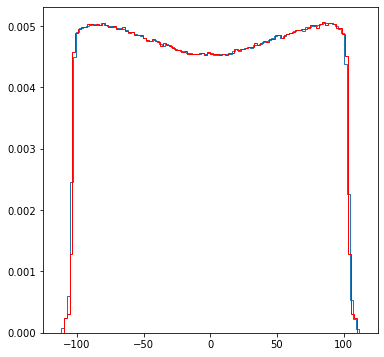

In [13]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True)

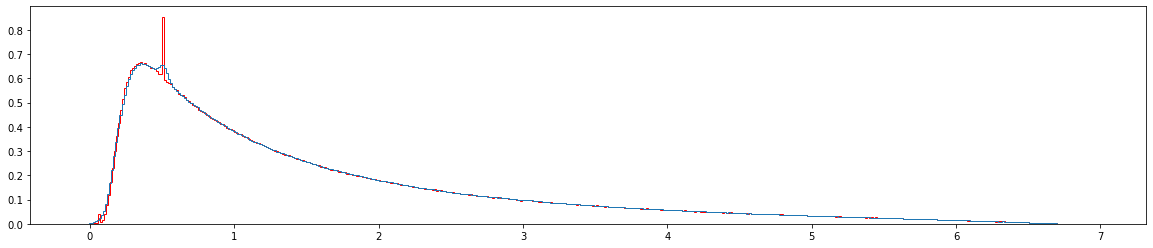

In [14]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True)
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True)

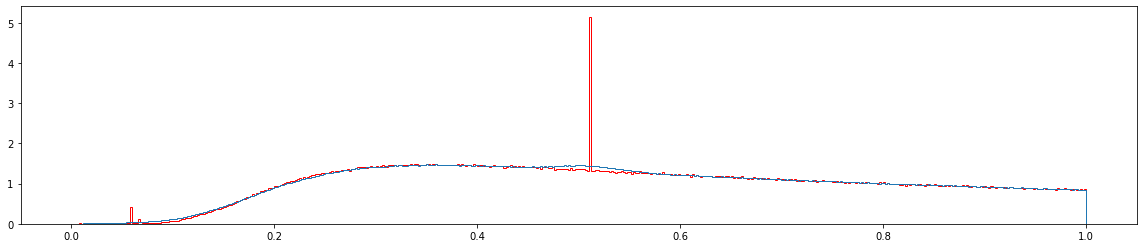

In [15]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True,range=(0,1))
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True,range=(0,1))


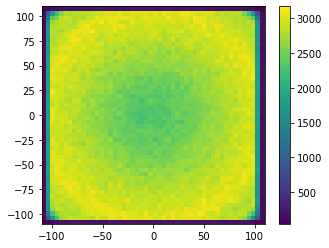

In [16]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['X'],df['Y'],bins=(50,50))
plt.colorbar()


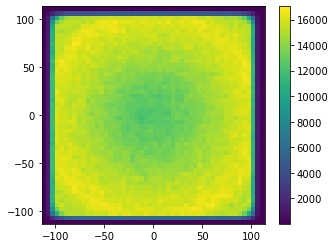

In [17]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['Y'],bins=(50,50))
plt.colorbar()


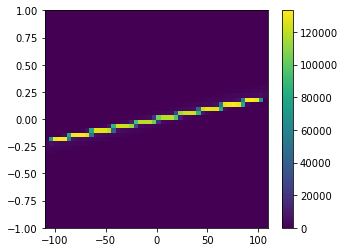

In [18]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['X'],df['dX'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

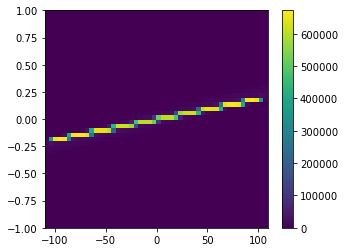

In [19]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['dX'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

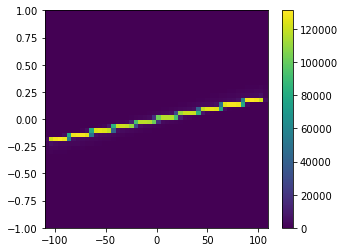

In [20]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['Y'],df['dY'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

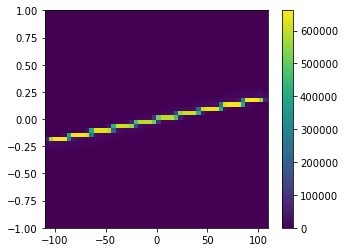

In [21]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['Y'],newdf['dY'],bins=(50,50),range=((-110,110),(-1,1)))
plt.colorbar()

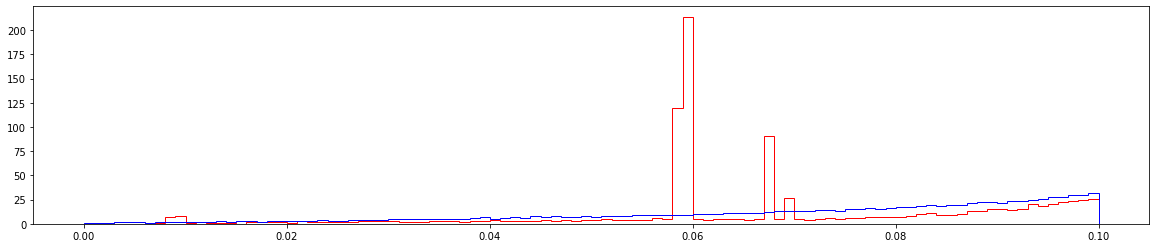

In [24]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=100,histtype='step',color='red',density=True,range=(0,0.1))
_=plt.hist(newdf['Ekine'],bins=100,histtype='step',color='blue',density=True,range=(0,0.1))


In [23]:
bandwidth=0.025

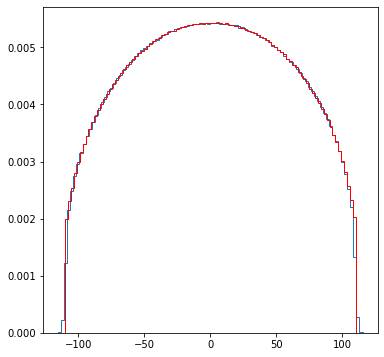

In [8]:
kde = stats.gaussian_kde(values,bw_method=bandwidth)
newsample = stats.gaussian_kde.resample(kde,32000000)
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','dZ','Ekine'])
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True)

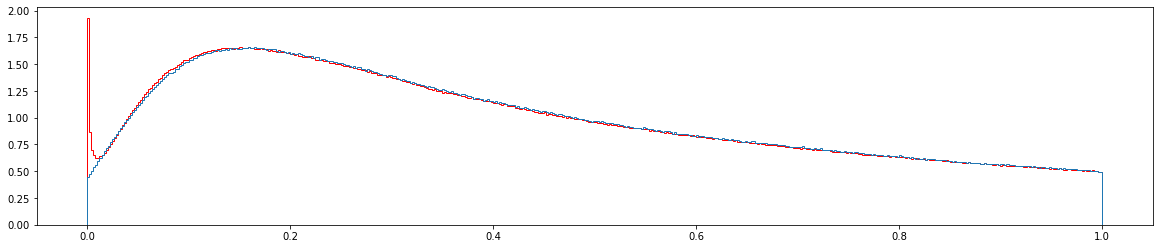

In [9]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True,range=(0,1))
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True,range=(0,1))

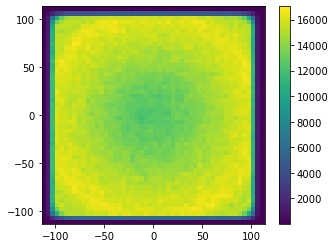

In [25]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['Y'],bins=(50,50))
plt.colorbar()


## 10x10

In [3]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Gamma_v2/Skimmed_output*1.root"
]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','dZ','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is

/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Gamma_v2/Skimmed_output*1.root   



In [4]:
for files_g in filenames_g:
    print(data_frame_dict[files_g])

                 X          Y        dX        dY        dZ     Ekine
0        25.582344  -3.315764  0.051877 -0.003972 -0.998646  0.651410
1        18.821501  21.812323  0.036727  0.043180 -0.998392  0.333999
2         2.537930 -15.729098  0.004788 -0.028456 -0.999584  0.506059
3       -11.276065  13.070518 -0.022862  0.025012 -0.999426  1.577100
4         4.913666   8.369363  0.007989  0.017177 -0.999821  1.767241
...            ...        ...       ...       ...       ...       ...
6714153  22.914707   2.631777  0.044418  0.004531 -0.999003  2.904579
6714154  -5.665768   1.809504 -0.015460  0.007919 -0.999849  0.478765
6714155   0.308903  13.796370  0.002133  0.031158 -0.999512  0.577654
6714156   5.669154 -10.254380  0.010791 -0.019656 -0.999749  3.792716
6714157  -1.658329  -6.644236 -0.004795 -0.011385 -0.999924  0.588675

[6714158 rows x 6 columns]


In [5]:
for files_g in filenames_g:
    df=data_frame_dict[files_g]
    nparr=df.to_numpy()
    values=nparr.T
values


array([[ 2.5582344e+01,  1.8821501e+01,  2.5379298e+00, ...,
         3.0890250e-01,  5.6691542e+00, -1.6583287e+00],
       [-3.3157637e+00,  2.1812323e+01, -1.5729098e+01, ...,
         1.3796370e+01, -1.0254380e+01, -6.6442356e+00],
       [ 5.1877465e-02,  3.6727168e-02,  4.7880244e-03, ...,
         2.1329322e-03,  1.0791079e-02, -4.7954828e-03],
       [-3.9721103e-03,  4.3180030e-02, -2.8455678e-02, ...,
         3.1158341e-02, -1.9656494e-02, -1.1384752e-02],
       [-9.9864554e-01, -9.9839199e-01, -9.9958360e-01, ...,
        -9.9951220e-01, -9.9974853e-01, -9.9992371e-01],
       [ 6.5140969e-01,  3.3399901e-01,  5.0605887e-01, ...,
         5.7765400e-01,  3.7927158e+00,  5.8867508e-01]], dtype=float32)

In [6]:
bandwidth=0.02

In [7]:
kde = stats.gaussian_kde(values,bw_method=bandwidth)


In [33]:
newsample = stats.gaussian_kde.resample(kde,5000000)


In [34]:
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','dZ','Ekine'])

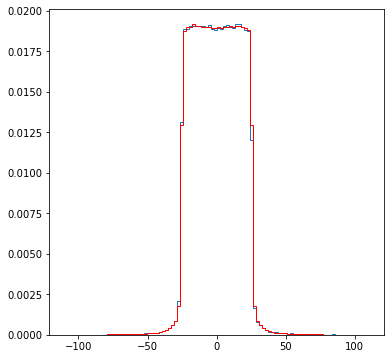

In [11]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(df['X'],bins=100,histtype='step',color='red',density=True)

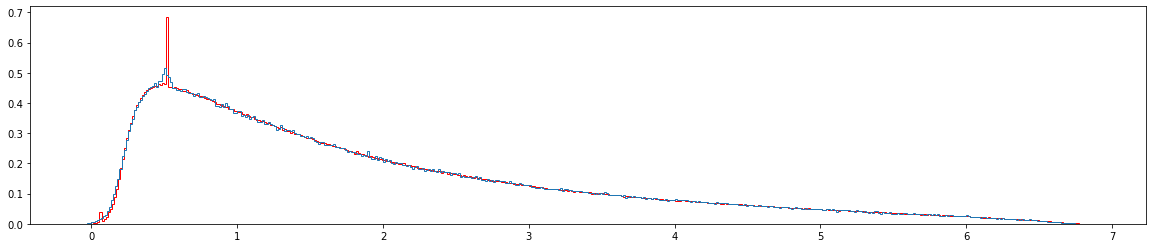

In [12]:
plt.figure(figsize=(20,4))
_=plt.hist(df['Ekine'],bins=500,histtype='step',color='red',density=True)
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True)

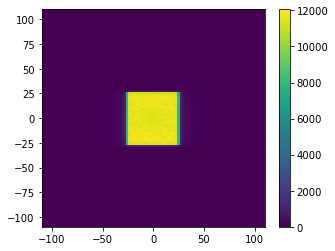

In [14]:
plt.figure(figsize=(5,4))
_=plt.hist2d(df['X'],df['Y'],bins=(100,100))
plt.colorbar()


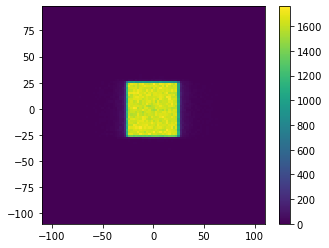

In [15]:
plt.figure(figsize=(5,4))
_=plt.hist2d(newdf['X'],newdf['Y'],bins=(100,100))
plt.colorbar()


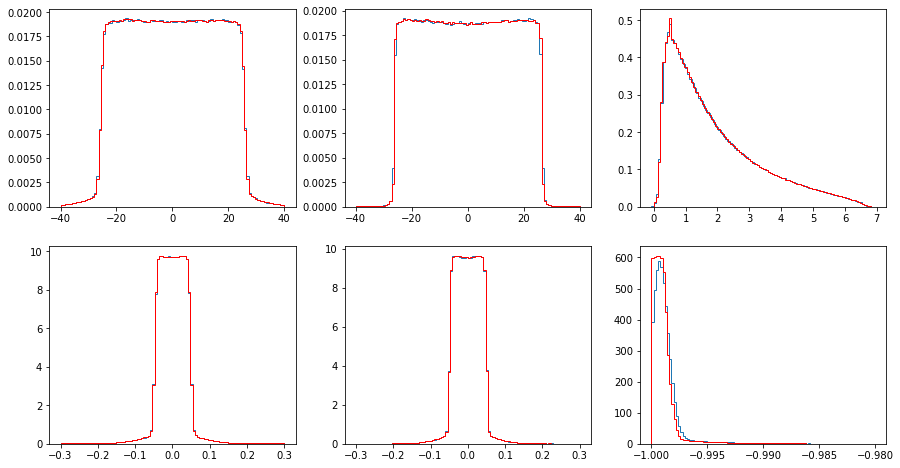

In [36]:
fig,ax=plt.subplots(2,3,figsize=(15,8))
_=ax[0,0].hist(newdf['X'],bins=100,histtype='step',density=True,range=(-40,40))
_=ax[0,0].hist(df['X'],bins=100,histtype='step',color='red',density=True,range=(-40,40))
_=ax[0,1].hist(newdf['Y'],bins=100,histtype='step',density=True,range=(-40,40))
_=ax[0,1].hist(df['Y'],bins=100,histtype='step',color='red',density=True,range=(-40,40))
_=ax[0,2].hist(newdf['Ekine'],bins=100,histtype='step',density=True)
_=ax[0,2].hist(df['Ekine'],bins=100,histtype='step',color='red',density=True)
_=ax[1,0].hist(newdf['dX'],bins=100,histtype='step',density=True,range=(-0.3,0.3))
_=ax[1,0].hist(df['dX'],bins=100,histtype='step',color='red',density=True,range=(-0.3,0.3))
_=ax[1,1].hist(newdf['dY'],bins=100,histtype='step',density=True,range=(-0.3,0.3))
_=ax[1,1].hist(df['dY'],bins=100,histtype='step',color='red',density=True,range=(-0.3,0.3))
_=ax[1,2].hist(newdf['dZ'],bins=100,histtype='step',density=True,range=(-1,-0.98))
_=ax[1,2].hist(df['dZ'],bins=100,histtype='step',color='red',density=True,range=(-1,-0.98))